# Data Cleaning

We clean data to avoid Garbage in --> Garbage Out

- Issues that arise with messy data
- How to identify Duplicated
- Dealing with Outliers

How can data be messy?
1. Duplicated present in large numbers
2. Inconsistent Text (data depends on spellings)
3. Missing Data (Null values)
4. Outliers (These statistically change the metrics which in turn affect the overall accuracy after training)

### Missing Data

- Remove entire row entirely -- can bais the dataset
- Impute Data (relapce missing data with mean/median) -- We might be reducing realism of the data
- Mash the data (create a catergory for the missing data) -- assumes that all missing data is alike

### Outliers
Observations which are very distant from most the other observations

Best detected with Seaborne library (Histograms, Boxplots)

- You can remove them
- Assign it Mean or Median
- Transform (log)
- Keep them and use Outlier resistant models

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

For some reason the pyodide function 'download' does not work

In [28]:
# load data from server
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open('data/'+filename, 'wb') as f:
            f.write(await response.bytes())
            
# path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv"

# await download(path, 'Ames_housing_data.tsv')
housing_data = pd.read_csv('data/Ames_Housing_Data1.tsv', sep='\t')

housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [29]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [30]:
# describe used to get statistical data from a column
housing_data['SalePrice'].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
#value counts gives us an idea about categorial data
housing_data['Sale Condition'].value_counts()

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [32]:
# check correlations
house_numeric_data = housing_data.select_dtypes(['int64', 'float64'])

# this returns a correlaation matrix
house_numeric_corr = house_numeric_data.corr()

In [33]:
# Correlation of features with 'Sale Price'
house_numeric_corr['SalePrice']

Order             -0.031644
PID               -0.246617
MS SubClass       -0.085206
Lot Frontage       0.357141
Lot Area           0.266600
Overall Qual       0.799226
Overall Cond      -0.101763
Year Built         0.558340
Year Remod/Add     0.532664
Mas Vnr Area       0.508277
BsmtFin SF 1       0.432950
BsmtFin SF 2       0.005848
Bsmt Unf SF        0.182808
Total Bsmt SF      0.632270
1st Flr SF         0.621672
2nd Flr SF         0.269222
Low Qual Fin SF   -0.037673
Gr Liv Area        0.706791
Bsmt Full Bath     0.276144
Bsmt Half Bath    -0.035870
Full Bath          0.545339
Half Bath          0.284909
Bedroom AbvGr      0.143934
Kitchen AbvGr     -0.119839
TotRms AbvGrd      0.495500
Fireplaces         0.474481
Garage Yr Blt      0.526808
Garage Cars        0.647891
Garage Area        0.640411
Wood Deck SF       0.327220
Open Porch SF      0.312970
Enclosed Porch    -0.128833
3Ssn Porch         0.032209
Screen Porch       0.112104
Pool Area          0.068392
Misc Val          -0

In [34]:
# top correlating features
top_features = house_numeric_corr['SalePrice'][abs(house_numeric_corr['SalePrice']) > 0.5].sort_values(ascending = False)

top_features

SalePrice         1.000000
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

## Pairplots

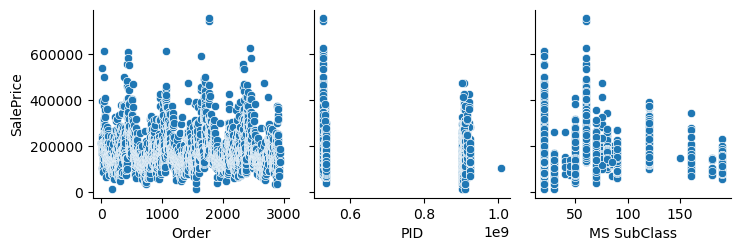

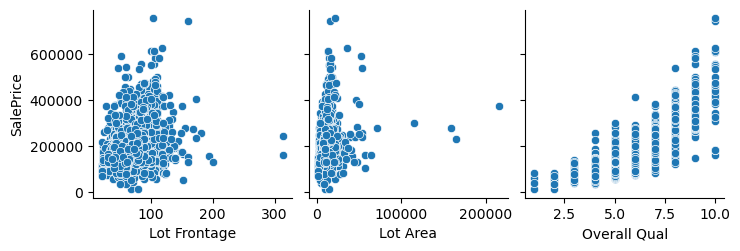

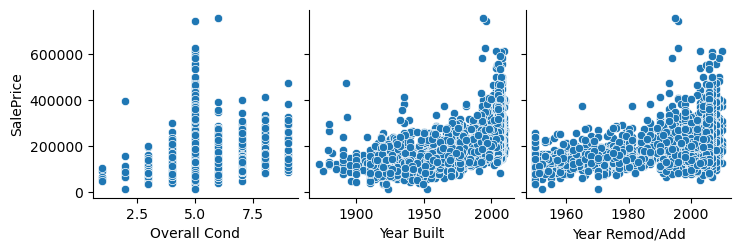

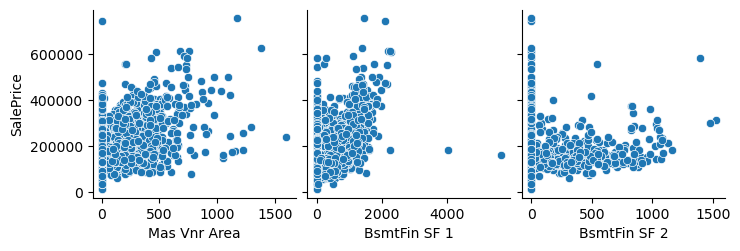

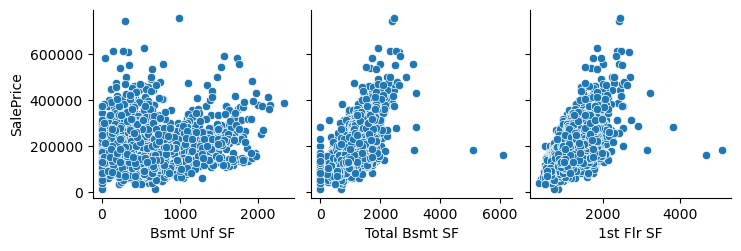

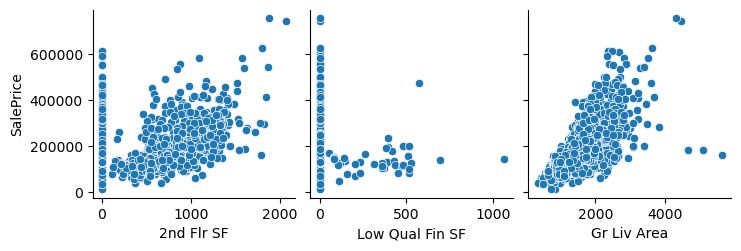

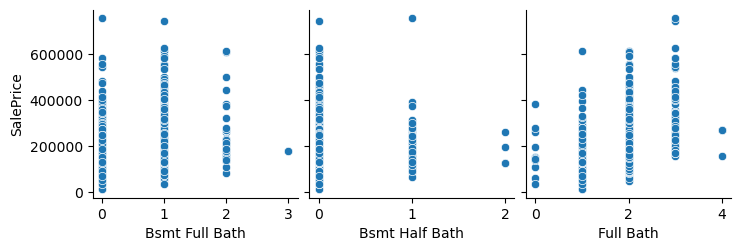

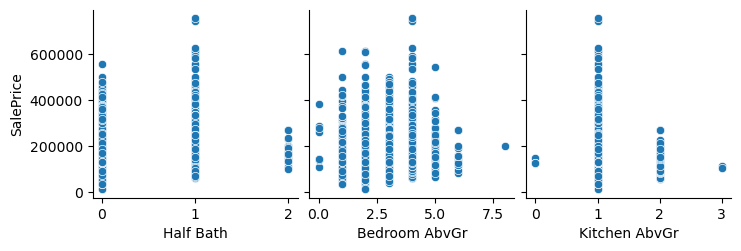

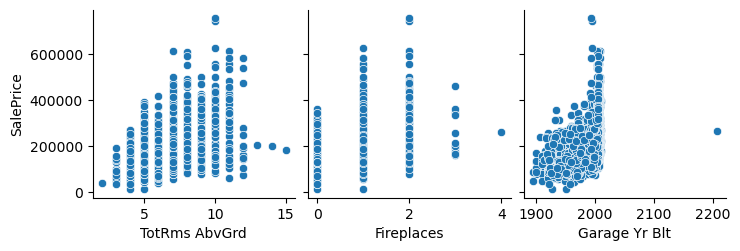

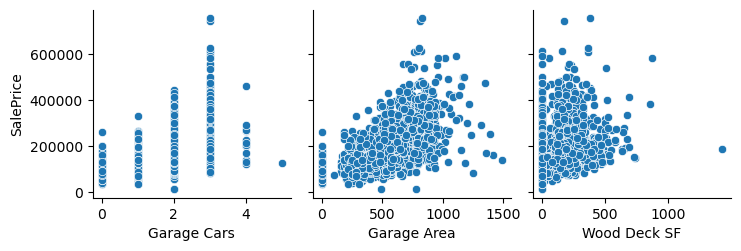

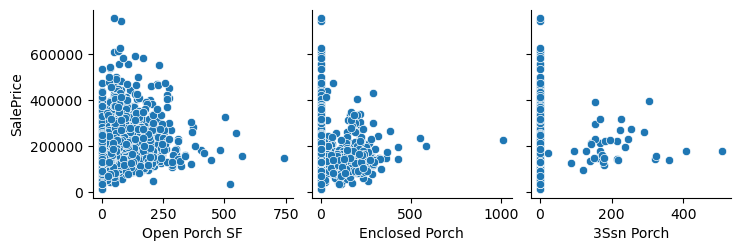

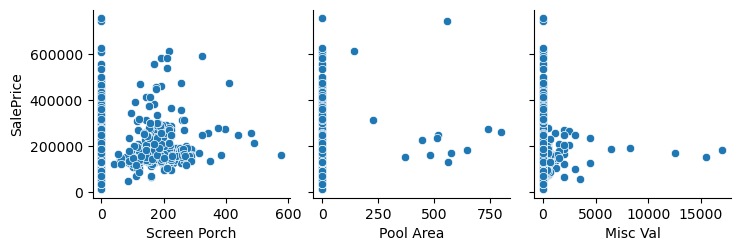

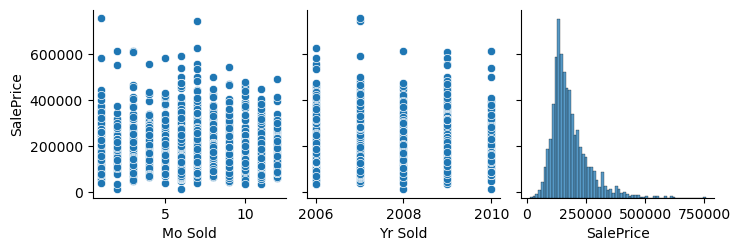

In [35]:
# try plotting all the features against Sale Price
for i in range (0, len(house_numeric_data.columns),3):
    sns.pairplot(data = house_numeric_data,
                 x_vars=house_numeric_data.columns[i:i+3],
                 y_vars=['SalePrice'])

# Log Transformations

## Distplots

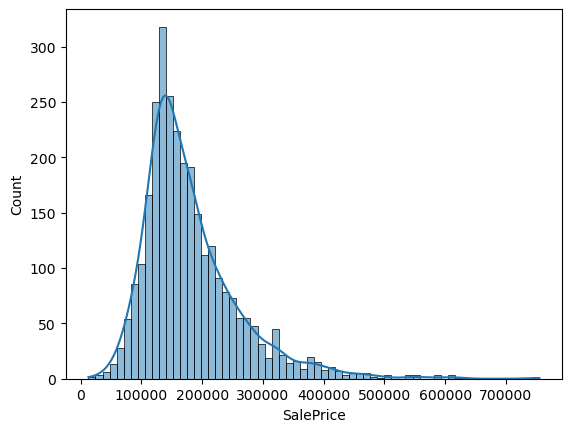

In [36]:
SalePrice_normal = sns.histplot(house_numeric_data['SalePrice'], kde=True)
# notice that the saleprice is somewhat normally distributed

In [37]:
# calculate the skew
skewness = housing_data['SalePrice'].skew()
print(f"skewness = {skewness:.2f}")

skewness = 1.74


New Skewness = -0.02


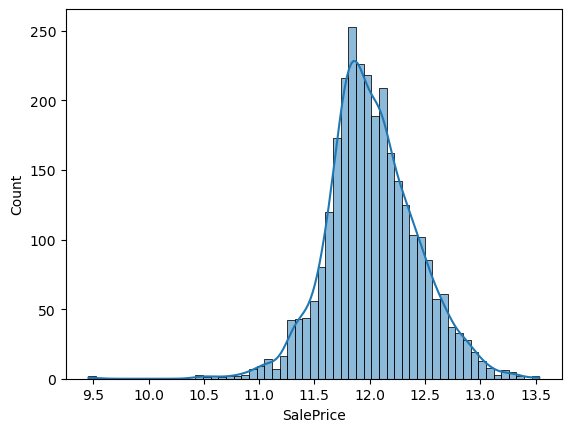

In [38]:
# transform data using log
transformed = np.log(housing_data['SalePrice'])

SalePrice_transformed = sns.histplot(transformed, kde=True)

# calculate skewness
skewness_transformed = transformed.skew()
print(f'New Skewness = {skewness_transformed:.2f}')

## Inspect Lot Area feature

### Apply log tranformation

Skewness before = 12.78


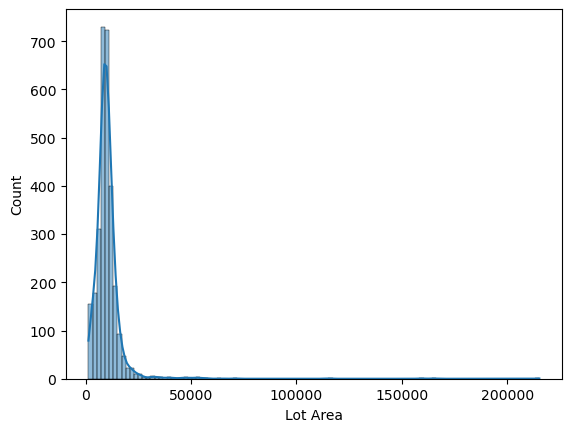

In [39]:
lot_area_plot = sns.histplot(housing_data['Lot Area'], kde=True)
skewness = housing_data['Lot Area'].skew()
print(f'Skewness before = {skewness:.2f}')

skewness after = -0.49


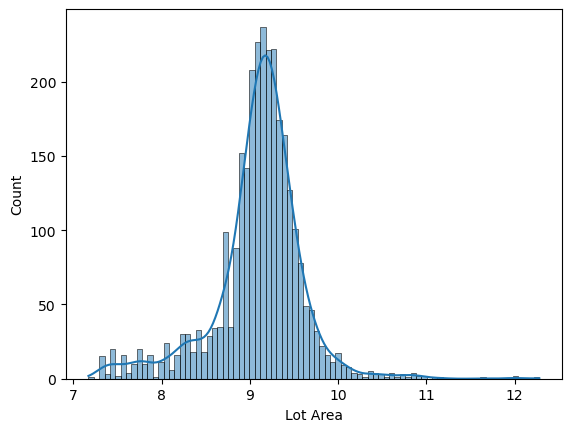

In [40]:
lot_area_log = np.log(housing_data['Lot Area'])
lot_area_log_plot = sns.histplot(lot_area_log, kde=True)
skewness_log = lot_area_log.skew()
print(f'skewness after = {skewness_log:.2f}')

## Handling Duplicates

In [41]:
duplicates = housing_data[housing_data.duplicated(['PID'])]
duplicates

# there is one duplicate row

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [42]:
data_removed = housing_data.drop_duplicates()
data_removed

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [43]:
# one way to check if a column/ feature has unique values
housing_data.index.is_unique

True

## Handling Missing Values

Text(0.5, 1.0, 'Top Features with most Missing Values')

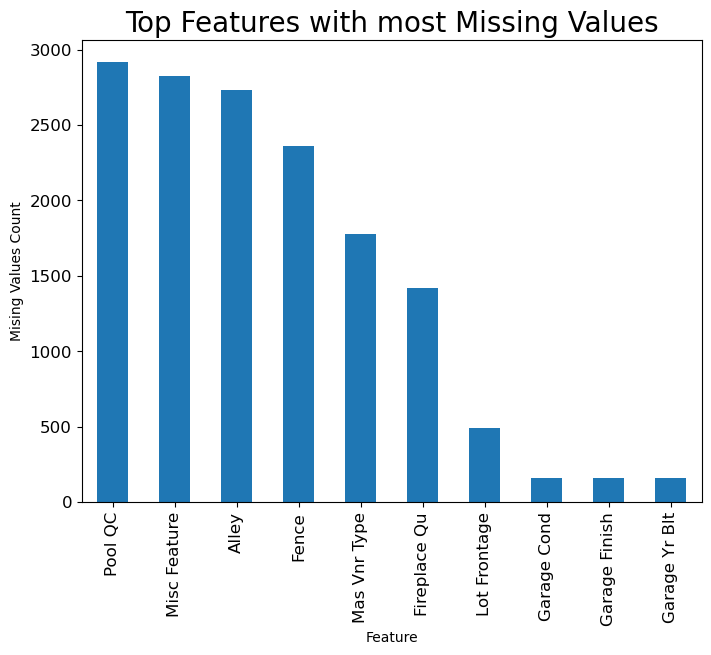

In [44]:
total_missing = housing_data.isnull().sum().sort_values(ascending=False)

# we can plot this series data into a graph
# plotting top 10 missing values
total_missing.head(10).plot(kind='bar', figsize=(8,6), fontsize=12)

plt.xlabel('Feature')
plt.ylabel('Mising Values Count')
plt.title('Top Features with most Missing Values', fontsize=20)

In [45]:
# dropping missing values based on a column
housing_data.dropna(subset=['Lot Frontage'])

# this drops rows

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [46]:
# dropping an entire column
housing_data.drop('Lot Frontage', axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [47]:
# replacing missing values with median
median = housing_data['Lot Frontage'].median()
median

68.0

In [48]:
# fill the misisng values using fillna
housing_data = housing_data['Lot Frontage'].fillna(median)

## Feature Scaling

Scaling keeps the feature quality intact while making the data less prone to bais doe to scale.

In [50]:
# this makes the extremes as ends and scales everything relative to them
norm_data = MinMaxScaler().fit_transform(house_numeric_data)

In [ ]:
scale_data = StandardScaler().fit_transform(house_numeric_data)  

In [58]:
# fit transform takes in a DataFrame
eg_data = StandardScaler().fit_transform(house_numeric_data[['SalePrice']])
eg_data

array([[ 0.4281423 ],
       [ 0.4281423 ],
       [-0.94923488],
       ...,
       [-0.61115139],
       [-0.13533019],
       [ 0.09005881]], shape=(2931, 1))

## Handling Outliers

### Uni-variate Analysis

<Axes: xlabel='Lot Area'>

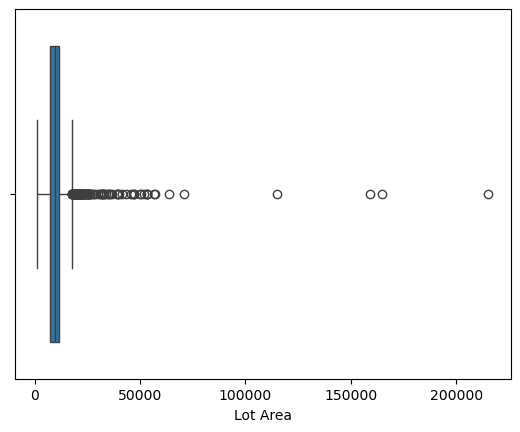

In [60]:
# box plot helps visualising outliers
sns.boxplot(x=house_numeric_data['Lot Area'])

### Bi-Variate Analysis

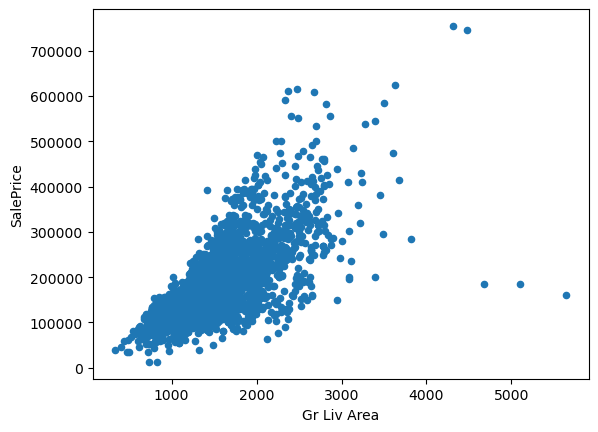

In [63]:
# we visualise features based on values of Target Variable
price_area = house_numeric_data.plot.scatter(x='Gr Liv Area', y='SalePrice')


# notice that 3 points have low saleprice even though they have high 'Gr Liv Area'

In [65]:
house_numeric_data.sort_values(by='Gr Liv Area', ascending=False)[:3]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
1499,1499,908154235,60,313.0,63887,10,5,2008,2008,796.0,...,214,292,0,0,0,480,0,1,2008,160000
2181,2181,908154195,20,128.0,39290,10,5,2008,2009,1224.0,...,546,484,0,0,0,0,17000,10,2007,183850
2182,2182,908154205,60,130.0,40094,10,5,2007,2008,762.0,...,208,406,0,0,0,0,0,10,2007,184750


Deleting the 3 outliers

In [66]:
new_house_numeric_data = house_numeric_data.drop(house_numeric_data.index[[1499, 2181, 2182]])

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

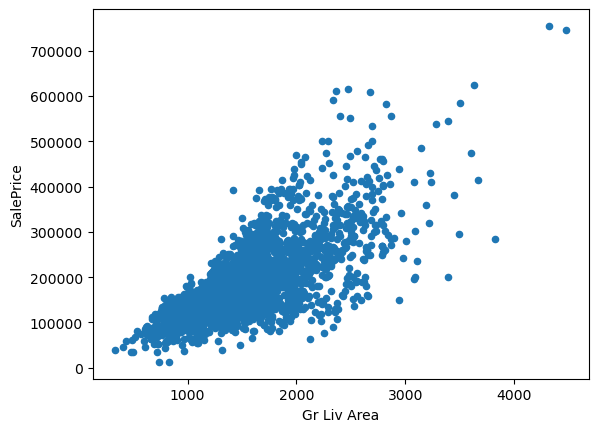

In [67]:
new_house_numeric_data.plot.scatter(x='Gr Liv Area', y='SalePrice')

## Z Score Analysis

Z Score Analysis is a mathematically determine outliers. It uses Standard Deviations to determine if a value is outlier or not.

If the Z Score is too high or too low. (+3 or -3), it means it is more than 3 deviations from the mean. Hence an Outlier

In [69]:
# create a new column which scales everything to there Z Score Value.
house_numeric_data['LQFSF'] = stats.zscore(house_numeric_data['Low Qual Fin SF'])
house_numeric_data['LQFSF']

0      -0.100988
1      -0.100988
2      -0.100988
3      -0.100988
4      -0.100988
          ...   
2926   -0.100988
2927   -0.100988
2928   -0.100988
2929   -0.100988
2930   -0.100988
Name: LQFSF, Length: 2931, dtype: float64

In [73]:
# let's compare some stats
house_numeric_data[['Low Qual Fin SF', 'LQFSF']].describe().round(3)

# the max value is 22, which means that it is an outlier

,Low Qual Fin SF,LQFSF
count,2931.000,2931.000
mean,4.675,-0.000
std,46.303,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.882
